<a href="https://colab.research.google.com/github/andreeo/computer-vision/blob/main/bitwise_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bitwise Operations

We will cover bitwise operations like AND or NOT and XOR. This operations come in handy when we are dealing with binary masks. For example, if you want to take the intersection of two binary masks you can simple use theand operations are extremely fast compared to arithmetic operations.

We will focus on the following bitwise operations:

**AND operation:**  [**cv2.bitwise_and**](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

**OR operation:**  [**cv2.bitwise_or**](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)

**NOT operation:**  [**cv2.bitwise_not**](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)

**XOR operation:** [**cv2.bitwise_xor**](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)

Here's a cheet sheet on the input and output table for these bitwise operations

| **Operation** | **Input-1** | **Input-2** | **Output** |
| --------|---|---|---|
| **AND** | 0 | 0 | 0 |
| **AND** | 0 | 1 | 0 |
| **AND** | 1 | 0 | 0 |
| **AND** | 1 | 1 | 1 |
| **OR**  | 0 | 0 | 0 |
| **OR**  | 0 | 1 | 1 |
| **OR**  | 1 | 0 | 1 |
| **OR**  | 1 | 1 | 1 |
| **NOT** | 0 |NA | 1 |
| **NOT** | 1 |NA | 0 |
| **XOR** | 0 | 0 | 0 |
| **XOR** | 0 | 1 | 1 |
| **XOR** | 1 | 0 | 1 |
| **XOR** | 1 | 1 | 0 |

They will be highly useful while extracting any part of the image, defining and working with non-rectangular ROI etc.



#Example

To undertand the usage of the functions, let us take the sunglass example from the previous section and use bitwise operations to arrive at the same result.

We will follow the same steps, but instead of arithmetic operations line MULTIPLY & ADD, we will use bitwise operations like AND, NOT and OR.



In [1]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -qq drive/MyDrive/opencv-data/week1_python.zip  -d  /content/week1_python

Mounted at /content/drive
mapname:  conversion of  failed


In [3]:
imagePath = "/content/week1_python/data/images/"

Sunglass dimension = (136, 314, 4)


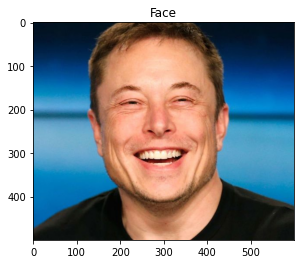

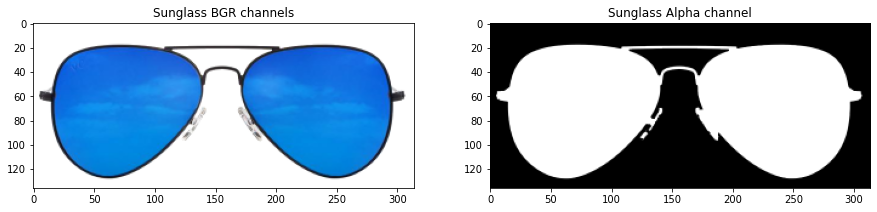

In [22]:
#load the face image
faceImagePath =  imagePath +  "musk.jpg";
faceImage = cv2.imread(faceImagePath);
#faceImage = np.float32(faceImage)/255

plt.imshow(faceImage[:,:,::-1]);plt.title("Face");

#load the sunglass image
sunglassImagePath = imagePath + "sunglass.png"
glassPNG = cv2.imread(sunglassImagePath, cv2.IMREAD_UNCHANGED); #we put  IMREAD_UNCHANGED  = -1  because we want read the transparent part of the image
#glassPNG = np.float32(glassPNG)/255


#resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG, None, fx=0.5, fy=0.5)
glassHeigh, glassWidth, nChannels =  glassPNG.shape
print("Sunglass dimension = {}".format(glassPNG.shape))

#separete the color  and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

#display the images for  clarity

plt.figure(figsize=[15,15]);
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title("Sunglass BGR channels");
plt.subplot(122);plt.imshow(glassMask1);plt.title("Sunglass Alpha channel");

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

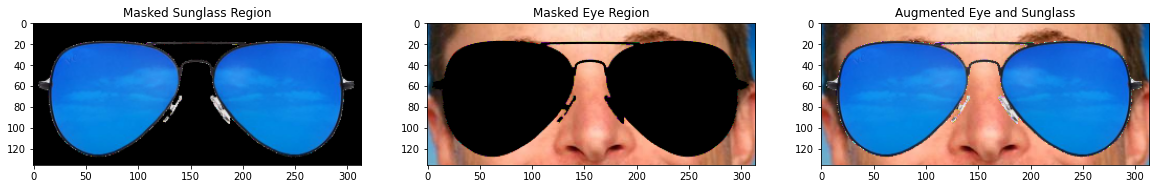

In [23]:
#top left corner of the glasses
glass_topLeftRow = 130
glass_topLeftCol = 130

glass_bottomRightRow = glass_topLeftRow + glassHeigh
glass_bottomRightColumn = glass_topLeftCol + glassWidth

#step 1
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))

#step 2
faceWithGlassesBitwise = faceImage.copy()
eyeROI = faceWithGlassesBitwise[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn]

#step 3
#maskedGlass = cv2.multiply(glassMask, glassBGR)
maskedGlass = cv2.bitwise_and(glassMask, glassBGR)

#step 4
#maskedEye = cv2.multiply((1-glassMask), eyeROI)
maskedEye = cv2.bitwise_and(cv2.bitwise_not(glassMask), eyeROI)

#step 5
#eyeRoiFinal1 = cv2.add(maskedGlass, maskedEye)
eyeRoiFinal1 = cv2.bitwise_or(maskedGlass, maskedEye)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(132);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(133);plt.imshow(eyeRoiFinal1[...,::-1]);plt.title("Augmented Eye and Sunglass")

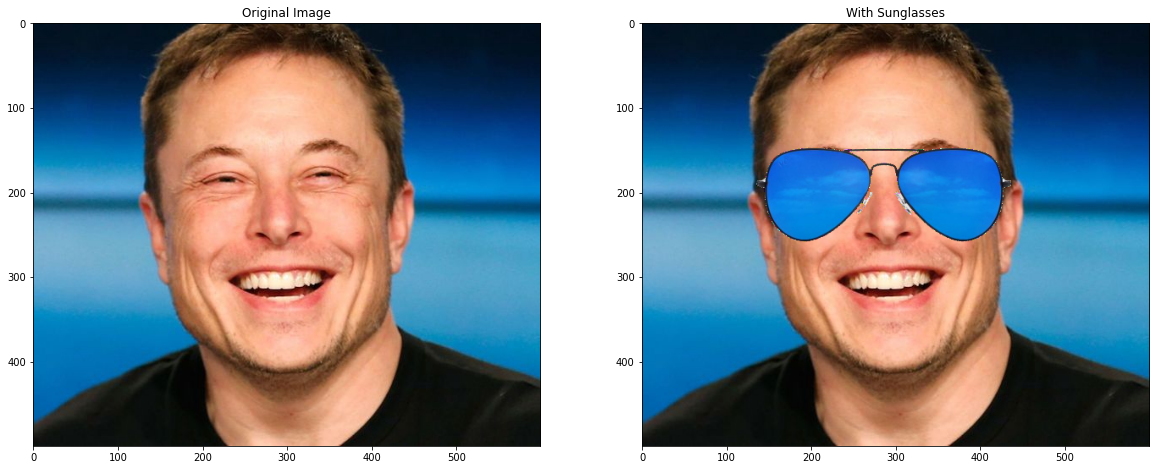

In [24]:
faceWithGlassesBitwise[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn] = eyeRoiFinal1

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");